In [4]:
import pandas as pd
import os

In [5]:
# os.makedirs(r'C:\Users\YOGA\Documents\Python Projects\Amazon Project\Amazon_Order', exist_ok=True)
os.chdir(r'C:\Users\YOGA\Documents\Python Projects\Amazon Project')
os.getcwd()

'C:\\Users\\YOGA\\Documents\\Python Projects\\Amazon Project'

In [6]:
orders=pd.read_excel('Amazon Orders Dataset.xlsx',sheet_name='Orders')
customers=pd.read_excel('Amazon Orders Dataset.xlsx',sheet_name='Customers')
sales_targets=pd.read_excel('Amazon Orders Dataset.xlsx',sheet_name='Sales Targets')

In [30]:
orders=orders[['Order ID','Customer ID','Customer Country',	'Order Datetime','Order Source','Sales POC','Order Value']]
orders

,Order ID,Customer ID,Customer Country,Order Datetime,Order Source,Sales POC,Order Value
0,1597,856,USA,2023-12-15 00:50:00,Other,Kwai Yu,412
1,2011,525,India,2023-04-29 23:40:00,Whatsapp,Paul Henriot,4551
2,2822,1614,USA,2023-12-30 00:21:00,Whatsapp,Daniel Da Cunha,3960
3,2889,743,USA,2023-11-28 00:31:00,Whatsapp,Julie Young,8397
4,3971,20,USA,2023-10-26 23:11:00,Website,Julie Brown,5545
...,...,...,...,...,...,...,...
2495,1680806,1304,Italy,2023-06-23 00:29:00,App,Janine Labrune,3072
2496,1681214,291,India,2023-05-15 01:00:00,Website,Jan Klaeboe,8168
2497,1681720,71,India,2023-04-06 00:24:00,Other,Michael Donnermeyer,1552
2498,1682186,1537,USA,2023-07-31 00:50:00,App,Steve Frick,9912


In [8]:
sales_targets

,Sales POC,Sales Manager First Name,Sales Manager Last Name,Sales Team,2023 Sales Target
0,Kalle Suominen,Amelia,Johnson,Epsilon,100000
1,Julie Brown,Lukas,Schmidt,Alpha,200000
2,Jeff Young,Olivia,Jensen,Beta,200000
3,Kyung Yu,Sofia,Laine,Gamma,100000
4,Adrian Huxley,Chloe,Dupont,Beta,200000
...,...,...,...,...,...
87,Valarie Thompson,Charlotte,Miller,Gamma,80000
88,Roland Mendel,Priya,Kapoor,Alpha,100000
89,Maria Hernandez,Oliver,Kumar,Beta,80000
90,Mory Kentary,Noah,Meier,Alpha,100000


In [9]:
customers

,Customer ID,Customer Country,Gender,Age,Category
0,1,France,M,31.0,A
1,2,Spain,M,49.0,A
2,3,USA,M,39.0,A
3,4,Australia,M,NaN,A
4,5,Denmark,M,81.0,A
...,...,...,...,...,...
2495,2496,France,F,89.0,E
2496,2497,Spain,M,74.0,E
2497,2498,Australia,M,35.0,E
2498,2499,USA,F,86.0,E


# Cleaning

In [35]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          2500 non-null   int64         
 1   Customer ID       2500 non-null   int64         
 2   Customer Country  2493 non-null   object        
 3   Order Datetime    2500 non-null   datetime64[ns]
 4   Order Source      2483 non-null   object        
 5   Sales POC         2500 non-null   object        
 6   Order Value       2500 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 136.8+ KB


In [57]:
orders['Customer Country'].isnull().sum()

7

In [59]:
orders['Order Source'].isnull().sum()

17

In [61]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       2500 non-null   int64  
 1   Customer Country  2500 non-null   object 
 2   Gender            2500 non-null   object 
 3   Age               2492 non-null   float64
 4   Category          2500 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 97.8+ KB


In [65]:
sales_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sales POC                 92 non-null     object
 1   Sales Manager First Name  92 non-null     object
 2   Sales Manager Last Name   92 non-null     object
 3   Sales Team                92 non-null     object
 4   2023 Sales Target         92 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.7+ KB


# Key finding

The best chanel

In [215]:
orders.groupby('Order Source')[['Order Value']].sum().sort_values(by='Order Value', ascending=False)

,Order Value
Order Source,
App,3192304
Website,3058941
Whatsapp,3013601
Other,2926813


Hence, The best sales channel was App.

# Which country is generating max revenue?

In [133]:
df=orders.merge(sales_targets, how='inner', on='Sales POC')
df

,Order ID,Customer ID,Customer Country,Order Datetime,Order Source,Sales POC,Order Value,Sales Manager First Name,Sales Manager Last Name,Sales Team,2023 Sales Target
0,1597,856,USA,2023-12-15 00:50:00,Other,Kwai Yu,412,Alexander,Müller,Alpha,200000
1,2011,525,India,2023-04-29 23:40:00,Whatsapp,Paul Henriot,4551,Sophia,Rossi,Beta,200000
2,2822,1614,USA,2023-12-30 00:21:00,Whatsapp,Daniel Da Cunha,3960,Lucas,Olsen,Gamma,100000
3,2889,743,USA,2023-11-28 00:31:00,Whatsapp,Julie Young,8397,Emma,Hansen,Gamma,150000
4,3971,20,USA,2023-10-26 23:11:00,Website,Julie Brown,5545,Lukas,Schmidt,Alpha,200000
...,...,...,...,...,...,...,...,...,...,...,...
2495,1680806,1304,Italy,2023-06-23 00:29:00,App,Janine Labrune,3072,Dev,Patel,Delta,200000
2496,1681214,291,India,2023-05-15 01:00:00,Website,Jan Klaeboe,8168,Lucas,Nielsen,Gamma,150000
2497,1681720,71,India,2023-04-06 00:24:00,Other,Michael Donnermeyer,1552,Mia,Khan,Epsilon,30000
2498,1682186,1537,USA,2023-07-31 00:50:00,App,Steve Frick,9912,Sophie,Gruber,Delta,100000


In [151]:
group=df.groupby('Customer Country')[['Order Value']].sum().sort_values(by='Order Value', ascending=False)
group

,Order Value
Customer Country,
USA,4258478
France,1637659
Spain,1378166
India,1356737
Australia,974217
Italy,538932
Singapore,486633
Finland,324319
Denmark,307260


In [157]:
import seaborn as sns
import matplotlib.pyplot as ptl

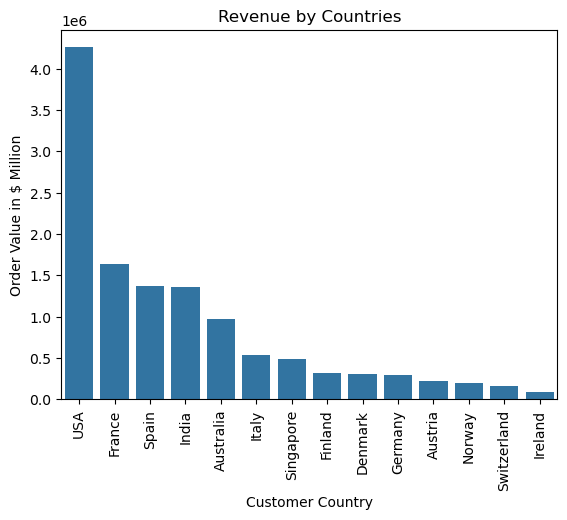

In [179]:
sns.barplot(data=group, x='Customer Country', y='Order Value')
ptl.xticks(rotation=90)
ptl.title('Revenue by Countries')
ptl.ylabel('Order Value in $ Million')
ptl.show()

US was definately creating more business for Amazon

# what was the overall sales performance and which team performed the best?

In [239]:
(orders['Order Value'].sum()/sales_targets['2023 Sales Target'].sum())

0.9583052302888369

In [202]:
group=df.groupby('Sales Team').agg(Sales_Targets=('2023 Sales Target','sum'), Sales=('Order Value','sum'))
group

,Sales_Targets,Sales
Sales Team,,
Alpha,314690000,3864300
Beta,77820000,2717137
Delta,207260000,1999414
Epsilon,37620000,1360064
Gamma,57370000,2334975


In [212]:
group['Percentage completed']=(group['Sales']/group['Sales_Targets'])*100
group.sort_values(by='Percentage completed',ascending=False)

,Sales_Targets,Sales,Percentage completed
Sales Team,,,
Gamma,57370000,2334975,4.070028
Epsilon,37620000,1360064,3.615268
Beta,77820000,2717137,3.491566
Alpha,314690000,3864300,1.227970
Delta,207260000,1999414,0.964689


# Customer Insights:

In [262]:
group=customers.groupby(['Gender','Age'])[['Customer ID']].count()
group

Customer ID
Gender Age              
F      18.0           19
       19.0           15
       20.0           17
       21.0           14
       22.0           18
...                  ...
M      86.0           16
       87.0           19
       88.0           10
       89.0           19
       90.0           16

[146 rows x 1 columns]

In [272]:
group.reset_index().sort_values(by='Customer ID', ascending=False).head(5)

,Gender,Age,Customer ID
93,M,38.0,28
12,F,30.0,27
40,F,58.0,26
108,M,53.0,26
82,M,27.0,25


In [286]:
group=df.groupby('Customer ID')[['Order Value']].sum().sort_values(by='Order Value',ascending=False).head(10)
group

,Order Value
Customer ID,
214,46901
1243,34268
376,31554
105,31525
1083,28240
1647,28091
446,27737
276,27315
958,27213


In [302]:
group.merge(customers, on='Customer ID', how='left')[['Customer ID','Customer Country','Gender','Age','Order Value']]

,Customer ID,Customer Country,Gender,Age,Order Value
0,214,USA,F,18.0,46901
1,1243,Spain,M,24.0,34268
2,376,India,F,89.0,31554
3,105,USA,M,80.0,31525
4,1083,Spain,F,25.0,28240
5,1647,USA,F,22.0,28091
6,446,USA,M,67.0,27737
7,276,India,F,59.0,27315
8,958,USA,M,89.0,27213
9,1583,Singapore,F,73.0,27063


In [326]:
sales_targets['Manager Name']=sales_targets['Sales Manager First Name']+ ' ' +sales_targets['Sales Manager Last Name']

In [334]:
sales_targets

,Sales POC,Sales Manager First Name,Sales Manager Last Name,Sales Team,2023 Sales Target,Full Name,Manager Name
0,Kalle Suominen,Amelia,Johnson,Epsilon,100000,Amelia Johnson,Amelia Johnson
1,Julie Brown,Lukas,Schmidt,Alpha,200000,Lukas Schmidt,Lukas Schmidt
2,Jeff Young,Olivia,Jensen,Beta,200000,Olivia Jensen,Olivia Jensen
3,Kyung Yu,Sofia,Laine,Gamma,100000,Sofia Laine,Sofia Laine
4,Adrian Huxley,Chloe,Dupont,Beta,200000,Chloe Dupont,Chloe Dupont
...,...,...,...,...,...,...,...
87,Valarie Thompson,Charlotte,Miller,Gamma,80000,Charlotte Miller,Charlotte Miller
88,Roland Mendel,Priya,Kapoor,Alpha,100000,Priya Kapoor,Priya Kapoor
89,Maria Hernandez,Oliver,Kumar,Beta,80000,Oliver Kumar,Oliver Kumar
90,Mory Kentary,Noah,Meier,Alpha,100000,Noah Meier,Noah Meier


In [342]:
Sales=sales_targets[['Sales POC','Manager Name','Sales Team','2023 Sales Target']]
Sales

,Sales POC,Manager Name,Sales Team,2023 Sales Target
0,Kalle Suominen,Amelia Johnson,Epsilon,100000
1,Julie Brown,Lukas Schmidt,Alpha,200000
2,Jeff Young,Olivia Jensen,Beta,200000
3,Kyung Yu,Sofia Laine,Gamma,100000
4,Adrian Huxley,Chloe Dupont,Beta,200000
...,...,...,...,...
87,Valarie Thompson,Charlotte Miller,Gamma,80000
88,Roland Mendel,Priya Kapoor,Alpha,100000
89,Maria Hernandez,Oliver Kumar,Beta,80000
90,Mory Kentary,Noah Meier,Alpha,100000


In [346]:
group=orders.merge(Sales, on='Sales POC',how='inner')
group

,Order ID,Customer ID,Customer Country,Order Datetime,Order Source,Sales POC,Order Value,Manager Name,Sales Team,2023 Sales Target
0,1597,856,USA,2023-12-15 00:50:00,Other,Kwai Yu,412,Alexander Müller,Alpha,200000
1,2011,525,India,2023-04-29 23:40:00,Whatsapp,Paul Henriot,4551,Sophia Rossi,Beta,200000
2,2822,1614,USA,2023-12-30 00:21:00,Whatsapp,Daniel Da Cunha,3960,Lucas Olsen,Gamma,100000
3,2889,743,USA,2023-11-28 00:31:00,Whatsapp,Julie Young,8397,Emma Hansen,Gamma,150000
4,3971,20,USA,2023-10-26 23:11:00,Website,Julie Brown,5545,Lukas Schmidt,Alpha,200000
...,...,...,...,...,...,...,...,...,...,...
2495,1680806,1304,Italy,2023-06-23 00:29:00,App,Janine Labrune,3072,Dev Patel,Delta,200000
2496,1681214,291,India,2023-05-15 01:00:00,Website,Jan Klaeboe,8168,Lucas Nielsen,Gamma,150000
2497,1681720,71,India,2023-04-06 00:24:00,Other,Michael Donnermeyer,1552,Mia Khan,Epsilon,30000
2498,1682186,1537,USA,2023-07-31 00:50:00,App,Steve Frick,9912,Sophie Gruber,Delta,100000


In [359]:
Best_Managers=group.groupby('Manager Name')[['Order Value']].sum().sort_values(by='Order Value', ascending=False).head(5)
Best_Managers

,Order Value
Manager Name,
Noah Meier,1402941
Benjamin Chen,1032580
Isabella Garcia,540410
Marco Bianchi,489267
Benjamin Weber,466003


top 5 performaning Managers

In [377]:
Best_Managers.merge(Sales[['Manager Name','Sales Team']], on ='Manager Name',how='left').drop_duplicates().reset_index(drop=True)

,Manager Name,Order Value,Sales Team
0,Noah Meier,1402941,Alpha
1,Benjamin Chen,1032580,Delta
2,Isabella Garcia,540410,Alpha
3,Marco Bianchi,489267,Alpha
4,Benjamin Weber,466003,Epsilon


# Cross Analysis
   - Analysing repeated customer(puchsed more than 4 times).

In [407]:
group=orders.groupby('Customer ID').agg(repeated_cust=('Customer ID', 'count')).sort_values(by='repeated_cust', ascending=False)
group.loc[group['repeated_cust']>=5]

,repeated_cust
Customer ID,
1948,7
214,6
1367,6
1475,5
1812,5
327,5
1794,5
899,5
1109,5


In [399]:
orders

,Order ID,Customer ID,Customer Country,Order Datetime,Order Source,Sales POC,Order Value
0,1597,856,USA,2023-12-15 00:50:00,Other,Kwai Yu,412
1,2011,525,India,2023-04-29 23:40:00,Whatsapp,Paul Henriot,4551
2,2822,1614,USA,2023-12-30 00:21:00,Whatsapp,Daniel Da Cunha,3960
3,2889,743,USA,2023-11-28 00:31:00,Whatsapp,Julie Young,8397
4,3971,20,USA,2023-10-26 23:11:00,Website,Julie Brown,5545
...,...,...,...,...,...,...,...
2495,1680806,1304,Italy,2023-06-23 00:29:00,App,Janine Labrune,3072
2496,1681214,291,India,2023-05-15 01:00:00,Website,Jan Klaeboe,8168
2497,1681720,71,India,2023-04-06 00:24:00,Other,Michael Donnermeyer,1552
2498,1682186,1537,USA,2023-07-31 00:50:00,App,Steve Frick,9912


In [456]:
import datetime
orders['month of the sales']=orders['Order Datetime'].dt.month
orders=orders.rename(columns={'month of the sales':'Sales_Month'})

In [458]:
orders

,Order ID,Customer ID,Customer Country,Order Datetime,Order Source,Sales POC,Order Value,Sales_Month
0,1597,856,USA,2023-12-15 00:50:00,Other,Kwai Yu,412,12
1,2011,525,India,2023-04-29 23:40:00,Whatsapp,Paul Henriot,4551,4
2,2822,1614,USA,2023-12-30 00:21:00,Whatsapp,Daniel Da Cunha,3960,12
3,2889,743,USA,2023-11-28 00:31:00,Whatsapp,Julie Young,8397,11
4,3971,20,USA,2023-10-26 23:11:00,Website,Julie Brown,5545,10
...,...,...,...,...,...,...,...,...
2495,1680806,1304,Italy,2023-06-23 00:29:00,App,Janine Labrune,3072,6
2496,1681214,291,India,2023-05-15 01:00:00,Website,Jan Klaeboe,8168,5
2497,1681720,71,India,2023-04-06 00:24:00,Other,Michael Donnermeyer,1552,4
2498,1682186,1537,USA,2023-07-31 00:50:00,App,Steve Frick,9912,7


In [506]:
import math
import numpy as np
group=orders.merge(sales_targets, on='Sales POC', how='inner')[['Sales POC','Sales_Month','Order Value','2023 Sales Target']].sort_values(by='Sales_Month')
group.reset_index(drop=True, inplace=True)
group['Target completion']= np.round(((group['Order Value']/group['2023 Sales Target'])*100),2)

In [518]:
group['Rolling3TC']=group['Target completion'].rolling(3).mean()
group.drop(columns=['Rolling3TC'], inplace=True)
group

,Sales POC,Sales_Month,Order Value,2023 Sales Target,Target completion
0,Mory Kentary,1,9227,100000,9.23
1,Elizabeth Devon,1,2890,100000,2.89
2,Valarie Nelson,1,17,1000000,0.00
3,Sue Frick,1,455,200000,0.23
4,Maria Larsson,1,6006,150000,4.00
...,...,...,...,...,...
2495,Roland Keitel,12,7392,80000,9.24
2496,Paul Henriot,12,6590,200000,3.30
2497,Giovanni Rovelli,12,8981,150000,5.99
2498,Valarie Nelson,12,6006,1000000,0.60


In [530]:
new_group=group.groupby(['Sales POC','Sales_Month'])[['Target completion']].apply(lambda x:x.rolling(3).mean())
new_group

Target completion
Sales POC       Sales_Month                        
Adrian Huxley   1           75                  NaN
                            148                 NaN
                            168            1.533333
                            216            2.386667
                2           247                 NaN
...                                             ...
Yoshi Tannamuri 10          1905                NaN
                            1945                NaN
                            1983           8.800000
                11          2133                NaN
                            2161                NaN

[2500 rows x 1 columns]

In [532]:
new_group.loc[new_group['Target completion']==100]

,,,Target completion
Sales POC,Sales_Month,,


In [536]:
# There is no Sales person who could complete the targets for 3 consistant months.

In [561]:
orders['Sales Quarters']=orders['Order Datetime'].dt.quarter
subset1=orders.merge(sales_targets, on='Sales POC', how='inner')[['Sales_Month','Sales Quarters','Order Value','2023 Sales Target']].rename(columns={'2023 Sales Target':'Sales Targets'})
subset1

,Sales_Month,Sales Quarters,Order Value,Sales Targets
0,12,4,412,200000
1,4,2,4551,200000
2,12,4,3960,100000
3,11,4,8397,150000
4,10,4,5545,200000
...,...,...,...,...
2495,6,2,3072,200000
2496,5,2,8168,150000
2497,4,2,1552,30000
2498,7,3,9912,100000


In [571]:
df=subset1.groupby('Sales_Month')[['Order Value','Sales Targets']].sum()
df

,Order Value,Sales Targets
Sales_Month,,
1,1053411,58680000
2,1095510,60630000
3,1017746,57140000
4,949980,50290000
5,1014640,59060000
6,1049400,60310000
7,1042742,59210000
8,1070103,62180000
9,928013,54530000


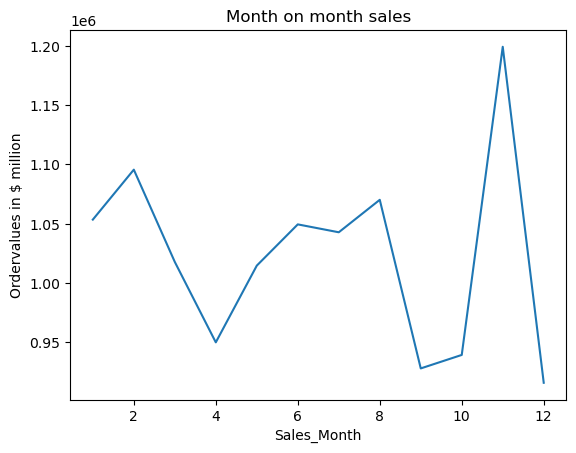

In [621]:
sns.lineplot(data=df,x='Sales_Month', y='Order Value')
plt.ylabel('Ordervalues in $ million')
plt.title('Month on month sales')
plt.show()

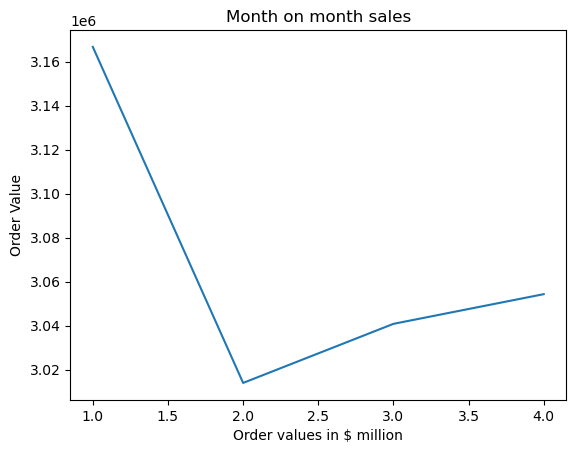

In [617]:
sns.lineplot(,x='Sales Quarters', y='Order Value')
plt.xlabel('Order values in $ million')
plt.title('Month on month sales')
plt.show()

In [619]:
df2=subset1.groupby('Sales Quarters')[['Order Value']].sum()
df2

,Order Value
Sales Quarters,
1,3166667
2,3014020
3,3040858
4,3054345


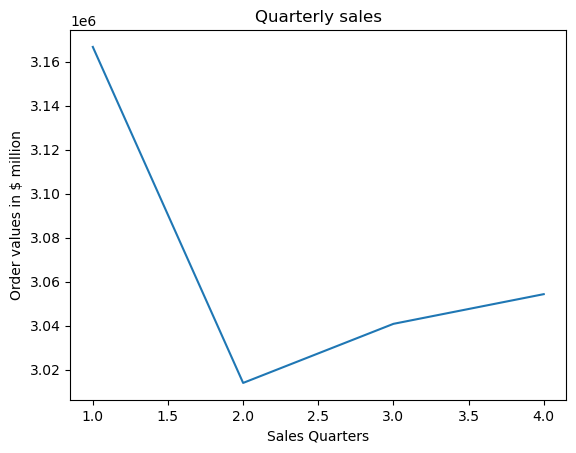

In [625]:
sns.lineplot(data=df2,x='Sales Quarters', y='Order Value')
plt.ylabel('Order values in $ million')
plt.title('Quarterly sales')
plt.show()